# Import library 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input,Dropout
from tensorflow.keras.models import Sequential  

%matplotlib inline



# dataset import

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Explor data analysis 

In [32]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [28]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
y_train[0]

5

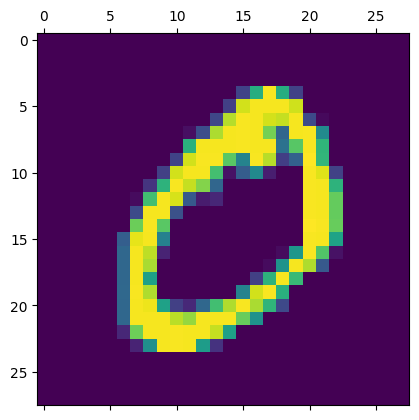

In [7]:
plt.matshow(x_train[1])

# Flatten and normalization

In [34]:
x_train_flatten = x_train.reshape(x_train.shape[0],-1)/255
x_test_flatten = x_test.reshape(x_test.shape[0],-1)/255


In [23]:
x_train_flatten.shape

(60000, 784)

# Model bulid

In [43]:
# Define the model
model = Sequential([
    Input(shape=(784,)),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(10, activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Fit the model (ensure x_train_flatten is the reshaped data and y_train is the label)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8915 - loss: 0.3610
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9730 - loss: 0.0862
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9819 - loss: 0.0549
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9864 - loss: 0.0425
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9897 - loss: 0.0309


# Pradicaion

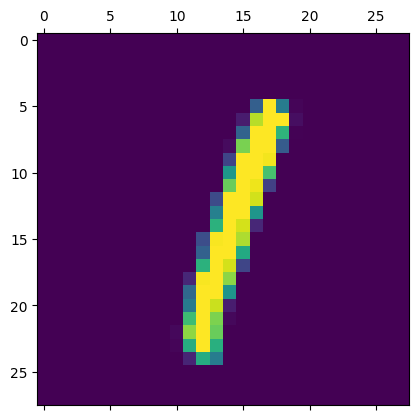

In [44]:
plt.matshow(x_test[5])

In [45]:
y_pred = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:

y_pred_label =[np.argmax(i) for i in y_pred]

# Model Evaluation

In [49]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    0,    4,    0,    0,    1],
       [   0, 1130,    0,    2,    0,    1,    1,    0,    1,    0],
       [   6,    1, 1002,    6,    2,    1,    3,    5,    6,    0],
       [   0,    2,    2, 1001,    0,    3,    0,    0,    1,    1],
       [   0,    2,    1,    1,  963,    0,    6,    0,    0,    9],
       [   1,    0,    0,    5,    1,  876,    6,    0,    2,    1],
       [   6,    3,    0,    1,    2,    9,  936,    0,    1,    0],
       [   2,    7,    6,    6,    0,    0,    0,  998,    4,    5],
       [   4,    1,    1,    7,    2,   14,    0,    0,  940,    5],
       [   4,    3,    0,    4,    6,    4,    1,    2,    1,  984]])>

Text(95.72222222222221, 0.5, 'truth')

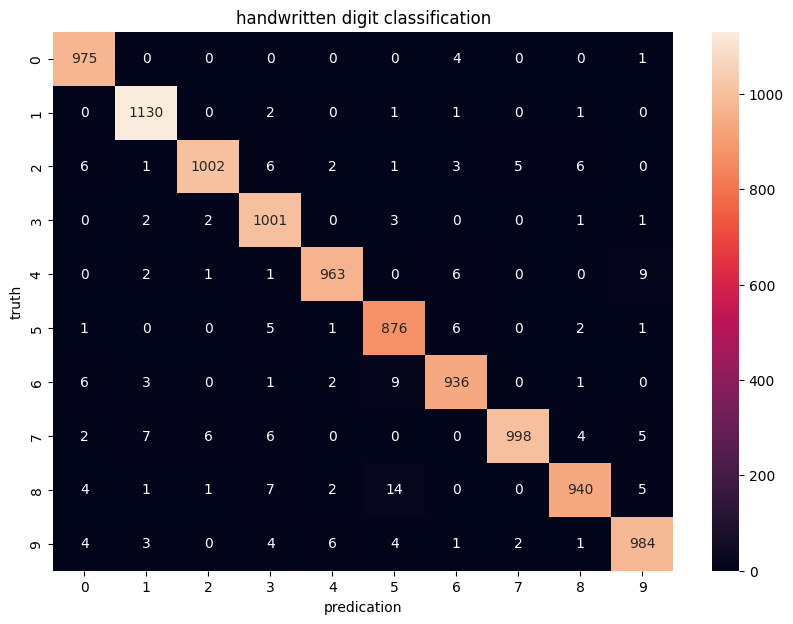

In [50]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.title("handwritten digit classification")
plt.xlabel("predication")
plt.ylabel("truth")